#### importing all the necessary libraries !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [3]:
print('Hello\tPython')

### Now, here 'Hello\tPython' is a normal string literal, the sequences “\t” will be treated as escape characters.

Hello	Python


In [4]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well

In [6]:
train_data.isnull().sum()

## train_data.isnull().sum(axis=0)
## by-default axis is 0 , ie it computes total missing values column-wise !

## train_data.isnull().sum(axis=1) -->> if axis=1 , ie it computes total missing values row-wise !

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
### getting all the rows where we have missing value
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Pre-process & Perform Featurization of "Date_of_Journey"
    ie pre-process it & extract day,month,year from "Date_of_Journey" feature..

In [11]:
data=train_data.copy()

In [12]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specif

In [17]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [19]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [20]:
### it means our data belongs to 2019 year only, hence extracting year feature & consider this as a input to my machine learning model makes no sense !
### but if we have more than 1 year  , then of-course it may impact !

## lets do Feature Engineering of "Date_of_Journey" & fetch day,month,year !

In [21]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [22]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [23]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [24]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-30 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-30 05:50:00,2023-03-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [25]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [26]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-30 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-30 05:50:00,2023-03-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


## Lets try to clean Dep_Time & Arrival_Time & featurize it..¶

In [27]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [28]:
# Departure time is when a plane leaves the gate

extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [29]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


## lets analyse when will most of the flights will take-off

In [30]:
### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if ( x> 4) and (x<=8 ):
        return 'Early mrng'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Noon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

<AxesSubplot:>

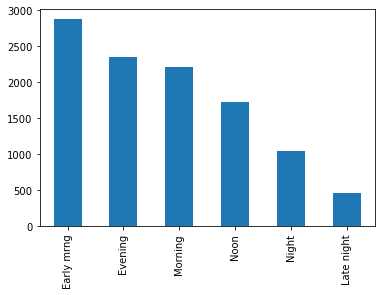

In [31]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [32]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


## Pre-process Duration Feature & extract meaningful features 

In [33]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x
    

In [34]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [35]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [36]:
data['Duration'][0].split(' ')[0]

'2h'

In [37]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [38]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [39]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [40]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [41]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


## Lets Analyse whether Duration impacts on Price or not ?

In [42]:
'2*60+50*1'

'2*60+50*1'

In [43]:
### eval is a in-built function of python which evaluates the “String” like a python expression and returns the result as an integer.
eval('2*60+50*1')

170

In [44]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [45]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


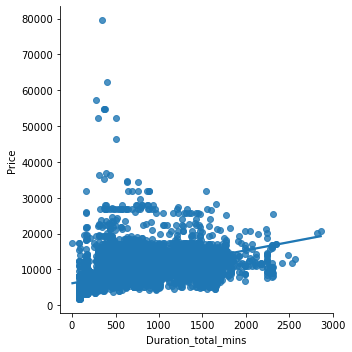

In [46]:
#### It Plot data and regression model fits across a FacetGrid.. (combination of 'regplot` and :class:`FacetGrid)
#### its a extended form of scatter plot..

sns.lmplot(x='Duration_total_mins',y='Price',data=data)


## Conclusion-->> pretty clear that As the duration of minutes increases Flight price also increases.

## which city has maximum final destination of flights ?

In [47]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:ylabel='Destination'>

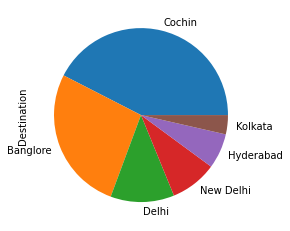

In [48]:
data['Destination'].value_counts().plot(kind='pie')

In [49]:
'''
Inference->> 
Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,

'''

'\nInference->> \nFinal destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,\n\n'

## Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights
    Problem Statement-->> on which route Jet Airways is extremely used???

In [50]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [51]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## Airline vs Price Analysis
    ie finding price distribution & 5-point summary of each Airline..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

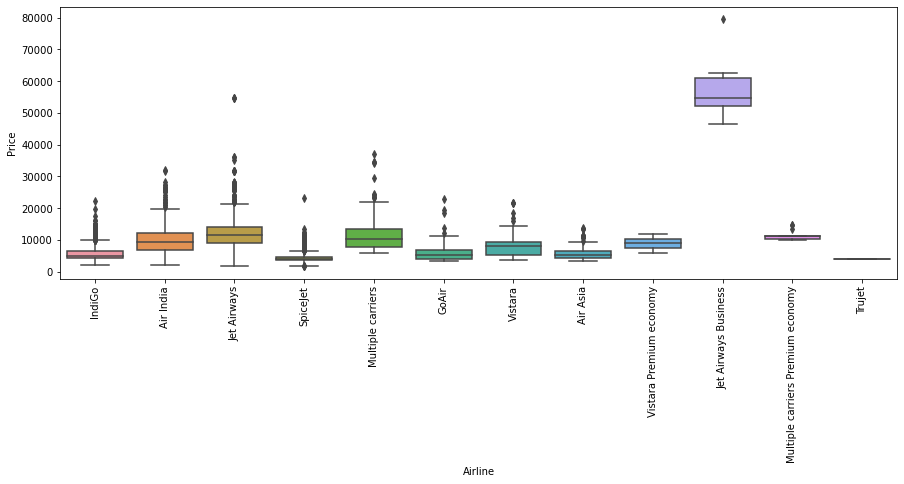

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [53]:
### when we need boxplot + distribution both , its good to consider violinplot..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

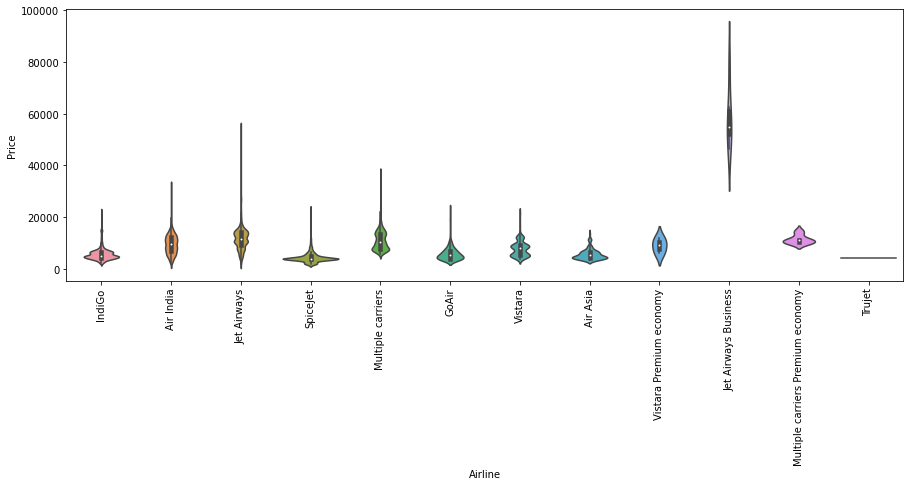

In [54]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

## Lets Perform Feature-Encoding on Data !
    Applying one-hot on data !

In [55]:
## but lets remove some of the un-necessary features !

In [56]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [57]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [58]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
## lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"

data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [59]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [60]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


## Lets separate categorical data & numerical data !
    categorical data are those whose data-type is 'object'
    Numerical data are those whose data-type is either int of float

In [61]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [62]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [63]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

## Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    if data belongs to Nominal data (ie data is not in any order) -->> OneHotEncoder is used in this case
    if data belongs to Ordinal data (ie data is in order ) -->>       LabelEncoder is used in this case

    But in real-world , it is not necessary that u have to always One-hot or label , hence we will discuss more interesting approaches to do this !

### Lets apply one-hot encoding on 'Source' feature !

In [64]:
### One-hot from scratch :

In [65]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [66]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [67]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [68]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [69]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


## Performing Target Guided Mean Encoding !
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..
    lets use Target Guided Mean Encoding in order to get rid of this..

In [70]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [71]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [72]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [73]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [74]:
data['Airline']=data['Airline'].map(dict1)

In [75]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [76]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [77]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [78]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [79]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [80]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [81]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [82]:
dict2={key:index for index,key in enumerate(dest,0)}

In [83]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [84]:
data['Destination']=data['Destination'].map(dict2)

In [85]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [86]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


### Perform Manual Encoding on Total_stops feature

In [87]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [88]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [89]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [90]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

## Performing Outlier Detection !
    Here the list of data visualization plots to spot the outliers.
1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot

In [91]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

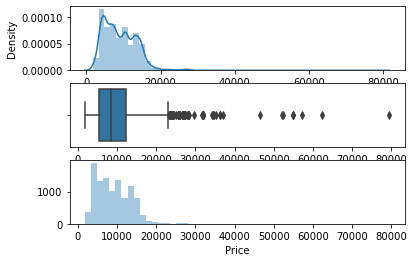

In [92]:
plot(data,'Price')

### getting a high level over-view of various ways to deal with outliers:


In [93]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


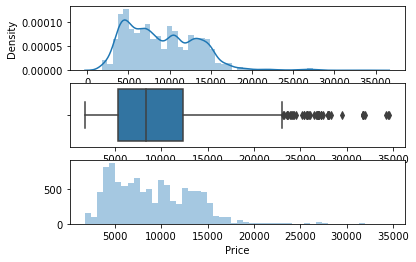

In [94]:
plot(data,'Price')

In [95]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [96]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [97]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [98]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

## Performing Feature Selection !

In [99]:
from sklearn.feature_selection import mutual_info_regression

In [100]:
X=data.drop(['Price'],axis=1)

In [101]:
y=data['Price']

In [102]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [103]:
mutual_info_regression(X,y)

array([0.97406615, 0.99258422, 0.79218415, 0.19619122, 0.24188453,
       0.34090417, 0.26519995, 0.39735922, 0.34148906, 0.46529975,
       0.34609105, 0.38641361, 0.46453641, 0.52129585, 0.13775117,
       0.19354965])

In [104]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [105]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,0.997734
Airline,0.968870
Total_Stops,0.776575
Source_Delhi,0.526092
Duration_hours,0.462731
Source_Kolkata,0.457363
Arrival_Time_hour,0.388257
Source_Banglore,0.388053
Duration_mins,0.352771
Arrival_Time_minute,0.349805


## Lets build ML Model  , then later on we can think of saving it..

#### split dataset into train & test

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
type(X_train)

pandas.core.frame.DataFrame

#### what we often do in modelling:
    a..Initially ,lets build basic random forest model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
ml_model=RandomForestRegressor()

In [110]:
model=ml_model.fit(X_train,y_train)

In [111]:
y_pred=model.predict(X_test)

In [112]:
y_pred

array([16625.29,  6402.99,  8857.88, ...,  3472.1 ,  6215.89,  6985.96])

In [113]:
y_pred.shape

(2671,)

In [114]:
len(X_test)

2671

### How to save ML model into disk

In [121]:
#!pip install pickle

In [122]:
#import pickle

In [123]:
#file=open(r'E:\End-2-end Projects\Flight_Price\Datasets/rf_random.pkl','wb')

In [124]:
#pickle.dump(model,file)

In [125]:
#model=open(r'E:\End-2-end Projects\Flight_Price\Datasets/rf_random.pkl','rb')

In [126]:
#forest=pickle.load(model)

In [127]:
#forest.predict(X_test)

## Defining your own evaluation metric :

In [128]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [130]:
mape(y_test,model.predict(X_test))

13.262882948756488

## How to Automate ML Pipeline :

In [131]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    

Training_score: 0.9518907366983592
Predictions are : [16744.87  6324.28  8816.09 ...  3528.27  6191.58  7102.58]


r2_score: 0.8038908539449012
MSE :  3817774.3461300326
MAE :  1186.6311608005228
RMSE :  1953.912573819523
MAPE :  13.282634813375063


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


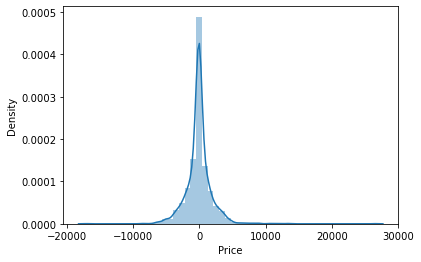

In [132]:
predict(RandomForestRegressor())

## how to hypertune ml model
    Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model 
    4.Check best parameters and best score

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [135]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [136]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [137]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [138]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [139]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [140]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [141]:
### to get your best model..
rf_Random.best_params_

{'n_estimators': 1040,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

In [142]:
pred2=rf_Random.predict(X_test)

In [143]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.827731982185295